In [39]:
from scipy.io import wavfile
import numpy as np

sample_rate, sound = wavfile.read("soundCA2.wav")

print(f"sample rate: {sample_rate} Hz")

sample rate: 16000 Hz


L = 160000


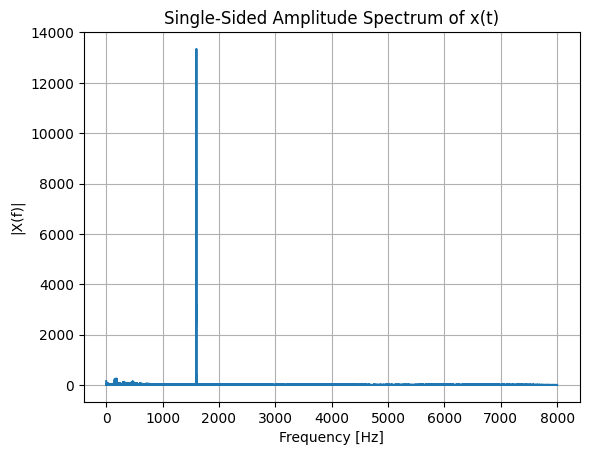

In [40]:
from numpy import fft
from matplotlib import pyplot as plt

def nextpow2(x):
    return (x-1).bit_length()

L = len(sound)
print(f"L = {L}")
NFFT = 2 ** nextpow2(L)
X = fft.fft(sound, n = NFFT)
X_abs = 2 * np.absolute(X) / L
half = int(NFFT/2)
freq = fft.fftfreq(NFFT, d=1/sample_rate)

fig, ax = plt.subplots(1, 1)
ax.plot(freq[:half], X_abs[:half])
ax.set_title('Single-Sided Amplitude Spectrum of x(t)')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('|X(f)|')
ax.grid()
plt.show()

1500 , 1800

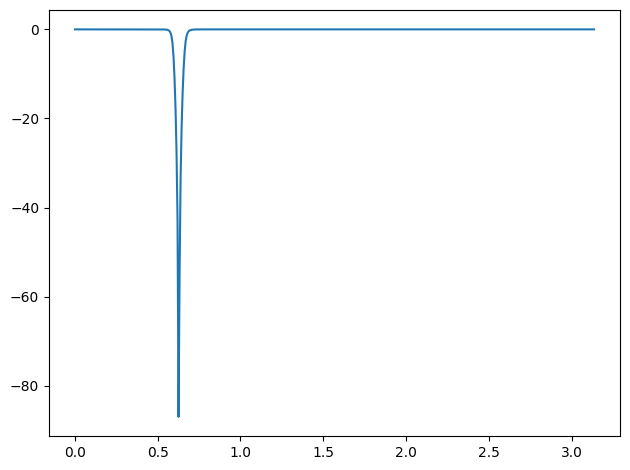

In [41]:
from scipy import signal

def butter_bandstop_filter(lowcut, highcut, fs, order = 3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(N = order, Wn = [low, high], btype='bandstop')
    return b, a

b, a = butter_bandstop_filter(1500, 1700, sample_rate)
w, h = signal.freqz(b, a)

fig, ax1 = plt.subplots(tight_layout = True)
ax1.plot(w, 20 * np.log10(abs(h)), 'C0')
plt.show()


In [42]:
from scipy.signal import filtfilt
filtered_voice = filtfilt(b, a, sound)

L = 160000


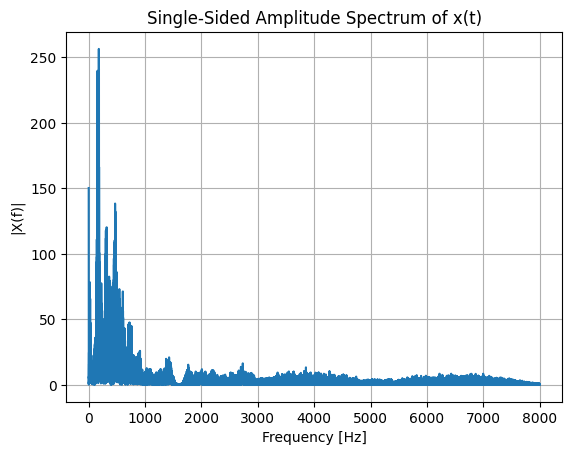

In [43]:
def nextpow2(x):
    return (x-1).bit_length()

L = len(filtered_voice)
print(f"L = {L}")
NFFT = 2 ** nextpow2(L)
X = fft.fft(filtered_voice, n = NFFT)
X_abs = 2 * np.absolute(X) / L
half = int(NFFT/2)
freq = fft.fftfreq(NFFT, d=1/sample_rate)

fig, ax = plt.subplots(1, 1)
ax.plot(freq[:half], X_abs[:half])
ax.set_title('Single-Sided Amplitude Spectrum of x(t)')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('|X(f)|')
ax.grid()
plt.show()

In [50]:
wavfile.write("noiseless.wav", sample_rate, filtered_voice.astype(np.int16))